In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
water_quality= pd.read_csv('/content/water_quality_dataset.csv')
water_quality = water_quality.dropna()

In [4]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'  # Assuming 'Potable' column contains labels (1 for portable, 0 for non-portable)

In [5]:
X=water_quality[features]
Y=water_quality[target]

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = keras.Sequential([
    layers.Reshape(target_shape=(len(features), 1), input_shape=(len(features),)),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history=model.fit(X_train, y_train,epochs=100, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/100
100/100 [==============================] - 2s 7ms/step - loss: 0.6864 - accuracy: 0.5661 - val_loss: 0.6792 - val_accuracy: 0.5825
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5986 - val_loss: 0.6756 - val_accuracy: 0.5813
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.5971 - val_loss: 0.6741 - val_accuracy: 0.5813
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.5977 - val_loss: 0.6726 - val_accuracy: 0.5813
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.5980 - val_loss: 0.6711 - val_accuracy: 0.5813
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.5989 - val_loss: 0.6695 - val_accuracy: 0.5813
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.5996 - val_loss: 0.6678 - val_accuracy: 0.5813

In [76]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

25/25 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.7800
Test accuracy: 0.7799999713897705


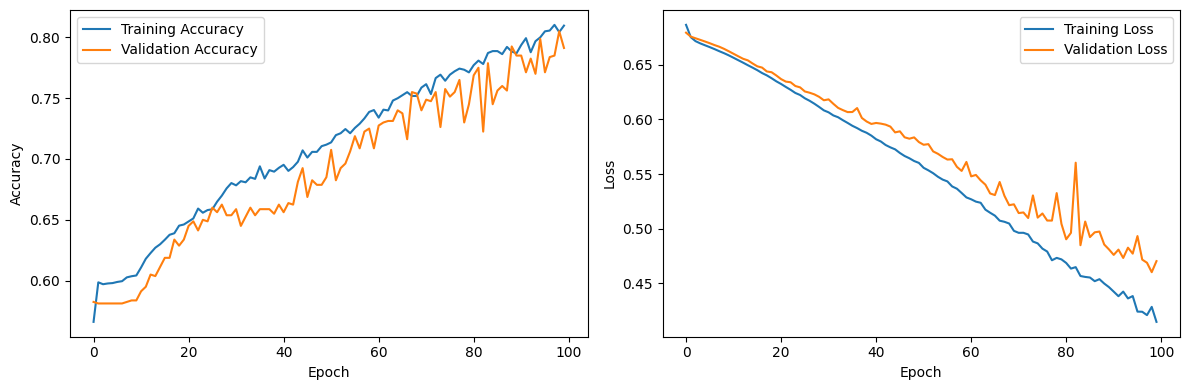

In [10]:
# Plot accuracy vs. epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss vs. epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
